In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
df_online_retail = pd.read_csv("online_retail.csv")
df_online_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


#### Actual frequency distribution of digits from 1 - 9.

In [273]:
actual = dict()
for i in range(1,10):
    actual[i] = round((sum(np.where(df_online_retail["UnitPrice"] // 1 == i, 1,0)) / len(df_online_retail[df_online_retail["UnitPrice"] > 1] )) * 100, 2)
df_actual_count = pd.DataFrame(actual, index = ["Actual%"])
print("Actual frequency distribution in %")
df_actual_count = df_actual_count.T
df_actual_count

Actual frequency distribution in %


,Actual%
1,32.33
2,23.33
3,9.23
4,12.15
5,5.37
6,1.79
7,3.74
8,3.78
9,1.87


#### Equal weight distribution and Brenford distribution

In [274]:
equal = {}
for i in range(1,10):
    equal[i] = 11.1
df_equal = pd.DataFrame(equal, index = ["Equal%"])
df_equal = df_equal.T
df_equal

,Equal%
1,11.1
2,11.1
3,11.1
4,11.1
5,11.1
6,11.1
7,11.1
8,11.1
9,11.1


In [275]:
df_brenford = pd.DataFrame([30.1,17.6,12.5,9.7,7.9,5.8,5.8,5.1,4.6], index = np.arange(1,10), columns = ["Brenford%"])
df_brenford

,Brenford%
1,30.1
2,17.6
3,12.5
4,9.7
5,7.9
6,5.8
7,5.8
8,5.1
9,4.6


#### 1. plot 3 histograms for the frequencies for real distribution, equal-weight and Bernford (for each digit)

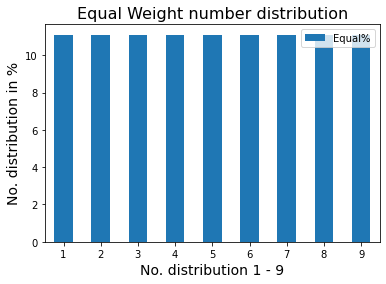

In [276]:
df_equal.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("Equal Weight number distribution",fontsize = 16)
plt.show()

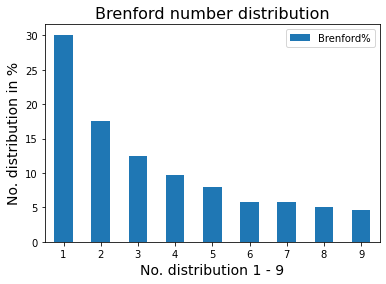

In [277]:
df_brenford.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("Brenford number distribution",fontsize = 16)
plt.show()

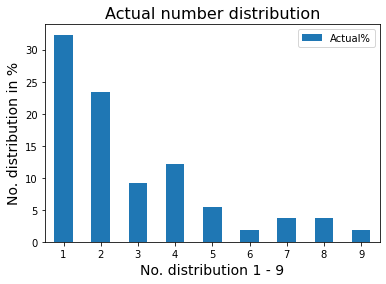

In [278]:
df_actual_count.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("No. distribution in %",fontsize = 14)
plt.title("Actual number distribution",fontsize = 16)
plt.show()

#### 2. plot 2 histograms for the relative errors for Models 1 and 2 (for each digit)

In [279]:
error_Model1 = list()
error_Model2 = list()
for i in range(1,10):
    error_Model1.append(round(abs(df_equal["Equal%"][i] - df_actual_count["Actual%"][i])/df_actual_count["Actual%"][i],2))
    error_Model2.append(round(abs(df_brenford["Brenford%"][i] - df_actual_count["Actual%"][i])/df_actual_count["Actual%"][i],2))

In [280]:
df_error_Model1 = pd.DataFrame({"Model1":error_Model1},index = np.arange(1,10))
df_error_Model2 = pd.DataFrame({"Model2":error_Model2},index = np.arange(1,10))

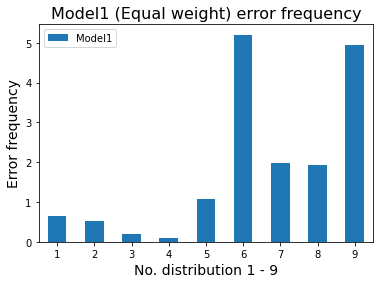

In [281]:
df_error_Model1.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("Error frequency",fontsize = 14)
plt.title("Model1 (Equal weight) error frequency",fontsize = 16)
plt.show()

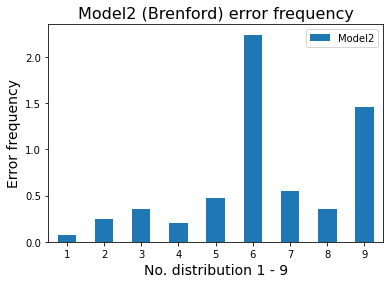

In [282]:
df_error_Model2.plot.bar(rot = 0)
plt.xlabel("No. distribution 1 - 9",fontsize = 14)
plt.ylabel("Error frequency",fontsize = 14)
plt.title("Model2 (Brenford) error frequency",fontsize = 16)
plt.show()

#### 3. compute RMSE (root mean squared error) for model 1, 2. Which model is closer to the real distribution?

In [283]:
rmse_error_Model1 = 0
rmse_error_Model2 = 0
for i in range(1,10):
    rmse_error_Model1 += (df_equal["Equal%"][i] - df_actual_count["Actual%"][i])**2
    rmse_error_Model2 += (df_brenford["Brenford%"][i] - df_actual_count["Actual%"][i])**2
rmse_error_Model1 = round(np.sqrt(rmse_error_Model1 / 9),2)
rmse_error_Model2 = round(np.sqrt(rmse_error_Model2 / 9),2)
print(f"""
RMSE for Model 1 {rmse_error_Model1} % and RMSE for Model 2 {rmse_error_Model2} %.
Hence Model 2(Brenford) describes the Actual data set better.
""")


RMSE for Model 1 10.1 % and RMSE for Model 2 3.17 %.
Hence Model 2(Brenford) describes the Actual data set better.



#### 4. take 3 countires of your choice: one from Asia, one from Europe and one from the Middle East.
* Singapore
* France
* Lebanon

In [284]:
def Country_df(d_frame,country):
    dict_df = dict()
    for i in range(1,10):
        dict_df[i] = round((sum(np.where(d_frame[d_frame["Country"] == country]["UnitPrice"] // 1 == i, 1,0)) / len(d_frame[d_frame["Country"] == country]["UnitPrice"] > 1 )) * 100, 2)
    df_r = pd.DataFrame(dict_df, index = ["%"])
    return df_r

In [290]:
df_singapore = Country_df(df_online_retail,"Singapore").T
df_france = Country_df(df_online_retail,"France").T
df_lebanon = Country_df(df_online_retail,"Lebanon").T

In [286]:
df_france

,%
1,31.80
2,18.92
3,4.78
4,5.49
5,1.78
6,0.69
7,2.61
8,2.53
9,1.02


In [287]:
df_singapore

,%
1,21.19
2,22.03
3,8.47
4,2.54
5,3.39
6,4.24
7,0.85
8,2.54
9,0.00


In [291]:
df_lebanon

,%
1,15.56
2,22.22
3,11.11
4,6.67
5,6.67
6,6.67
7,2.22
8,6.67
9,4.44


In [288]:
def rmse_cal(ctr_frame):
    rmse_m1 = 0
    rmse_m2 = 0
    for i in range(1,10):
        rmse_m1 += (df_equal["Equal%"][i] - ctr_frame["%"][i])**2
        rmse_m2 += (df_brenford["Brenford%"][i] - ctr_frame["%"][i])**2
    rmse_m1 = round(np.sqrt(rmse_m1 / 9),2)
    rmse_m2 = round(np.sqrt(rmse_m2 / 9),2)
    return [rmse_m1,rmse_m2]

singapore_rmse = rmse_cal(df_singapore)
france_rmse = rmse_cal(df_france)
lebanon_rmse = rmse_cal(df_lebanon)
country_equal_weight_df = pd.DataFrame([{singapore_rmse[0]},{france_rmse[0]},{lebanon_rmse[0]}], index = ["singapore","france","lebanon"], columns = ["Equal Weight RMSE %"])
country_equal_weight_df

,Equal Weight RMSE %
singapore,8.88
france,10.56
lebanon,6.19


* By looking at above figure we can conclude lebanon has the closest distribution to equal weight P.

In [289]:
country_brenford_df = pd.DataFrame([{singapore_rmse[1]},{france_rmse[1]},{lebanon_rmse[1]}], index = ["singapore","france","lebanon"], columns = ["Brenford RMSE %"])
country_brenford_df

,Brenford RMSE %
singapore,5.18
france,4.41
lebanon,5.39


* By looking at above figure we can conclude france has the closest distribution to Brenford law distribution.

#### 5. discuss your findings

* For my retail dataset we can see the first digit has close proximity to Brenford Law distribution than equal weight distribution from both the plot and RMSE.
* For my retail data for 3 choosen countries the first digit has close proximity to Brenford Law distribution than equal weight distribution based on RMSE%.